# Network Analysis with Enron Corpus

## Part 1: Preparing the data

In [1]:
#Imports data from file
import pandas as pd
emails_df = pd.read_csv("C:\\Users\\yangbo\\Documents\\PDBD\\14 Analytics COe\\emails.csv", nrows = 5000)


In [2]:
## Helper functions to pre-process data
def get_text_from_email(msg):
    '''To get the content from email objects'''
    parts = []
    for part in msg.walk():
        if part.get_content_type() == 'text/plain':
            parts.append( part.get_payload() )
    return ''.join(parts)

def split_email_addresses(line):
    '''To separate multiple email addresses'''
    if line:
        addrs = line.split(',')
        addrs = frozenset(map(lambda x: x.strip(), addrs))
    else:
        addrs = None
    return addrs

In [3]:
import email
# Parse the emails into a list email objects
messages = list(map(email.message_from_string, emails_df['message']))

emails_df.drop('message', axis=1, inplace=True)
# Get fields from parsed email objects
keys = messages[0].keys()
for key in keys:
    emails_df[key] = [doc[key] for doc in messages]
# Parse content from emails
emails_df['content'] = list(map(get_text_from_email, messages))
# Split multiple email addresses
emails_df['From'] = emails_df['From'].map(split_email_addresses)
emails_df['To'] = emails_df['To'].map(split_email_addresses)

# Extract the root of 'file' as 'user'
emails_df['user'] = emails_df['file'].map(lambda x:x.split('/')[0])
del messages


file                                     Message-ID  \
0     allen-p/_sent_mail/1.  <18782981.1075855378110.JavaMail.evans@thyme>   
1    allen-p/_sent_mail/10.  <15464986.1075855378456.JavaMail.evans@thyme>   
2   allen-p/_sent_mail/100.  <24216240.1075855687451.JavaMail.evans@thyme>   
3  allen-p/_sent_mail/1000.  <13505866.1075863688222.JavaMail.evans@thyme>   
4  allen-p/_sent_mail/1001.  <30922949.1075863688243.JavaMail.evans@thyme>   

                                    Date                       From  \
0  Mon, 14 May 2001 16:39:00 -0700 (PDT)  (phillip.allen@enron.com)   
1   Fri, 4 May 2001 13:51:00 -0700 (PDT)  (phillip.allen@enron.com)   
2  Wed, 18 Oct 2000 03:00:00 -0700 (PDT)  (phillip.allen@enron.com)   
3  Mon, 23 Oct 2000 06:13:00 -0700 (PDT)  (phillip.allen@enron.com)   
4  Thu, 31 Aug 2000 05:07:00 -0700 (PDT)  (phillip.allen@enron.com)   

                          To    Subject Mime-Version  \
0     (tim.belden@enron.com)                     1.0   
1  (john.lavorato@enron.com)        Re:          1.0   
2   (leah.arsdall@enron.com)   Re: test          1.0   
3    (randall.gay@enron.com)                     1.0   
4     (greg.piper@enron.com)  Re: Hello          1.0   

                   Content-Type Content-Transfer-Encoding           X-From  \
0  text/plain; charset=us-ascii                      7bit  Phillip K Allen   
1  text/plain; charset=us-ascii                      7bit  Phillip K Allen   
2  text/plain; charset=us-ascii                      7bit  Phillip K Allen   
3  text/plain; charset=us-ascii                      7bit  Phillip K Allen   
4  text/plain; charset=us-ascii                      7bit  Phillip K Allen   

                                                X-To X-cc X-bcc  \
0           Tim Belden <Tim Belden/Enron@EnronXGate>              
1  John J Lavorato <John J Lavorato/ENRON@enronXg...              
2                                   Leah Van Arsdall              
3                                      Randall L Gay              
4                                         Greg Piper              

                                            X-Folder X-Origin  \
0  \Phillip_Allen_Jan2002_1\Allen, Phillip K.\'Se...  Allen-P   
1  \Phillip_Allen_Jan2002_1\Allen, Phillip K.\'Se...  Allen-P   
2    \Phillip_Allen_Dec2000\Notes Folders\'sent mail  Allen-P   
3    \Phillip_Allen_Dec2000\Notes Folders\'sent mail  Allen-P   
4    \Phillip_Allen_Dec2000\Notes Folders\'sent mail  Allen-P   

                    X-FileName  \
0  pallen (Non-Privileged).pst   
1  pallen (Non-Privileged).pst   
2                   pallen.nsf   
3                   pallen.nsf   
4                   pallen.nsf   

                                             content     user  
0                          Here is our forecast\n\n   allen-p  
1  Traveling to have a business meeting takes the...  allen-p  
2                     test successful.  way to go!!!  allen-p  
3  Randy,\n\n Can you send me a schedule of the s...  allen-p  
4                Let's shoot for Tuesday at 11:45.    allen-p

In [4]:
#Set index and drop useless columns
emails_df = emails_df.set_index('Message-ID').drop(['file','Mime-Version','Content-Type','Content-Transfer-Encoding'],\
                                                  axis=1)
#Parse datetime
emails_df['Date'] = pd.to_datetime(emails_df['Date'], infer_datetime_format=True)

## A Basic Network

In [64]:
#Setting up basic network with the corpus data
import networkx as nx
import matplotlib.pyplot as plt
G = nx.DiGraph()


In [65]:
#Adding in all sender-receiver pair, with weight = number of emails sent from sender to receiver
for row in emails_df.itertuples():
    sender = list(row.From)[0]
    try:
        for receiver in list(row.To):
            if G.has_edge(sender, receiver):
                G[sender][receiver]['weight'] = G[sender][receiver]['weight'] +1
            else:
                G.add_edge(sender,receiver,weight=1)
    except: pass
        

In [72]:
#writes the graph to gephi
nx.write_gexf(G, "text.gexf")

In [96]:
#Finding the people with most messages received
node_degree = G.degree(weight = 'weight').items()
sorted_degrees = sorted(node_degree, key=lambda tuple: tuple[1])
personofinterest = [receiver for (receiver, degree) in sorted_degrees[-10:]]

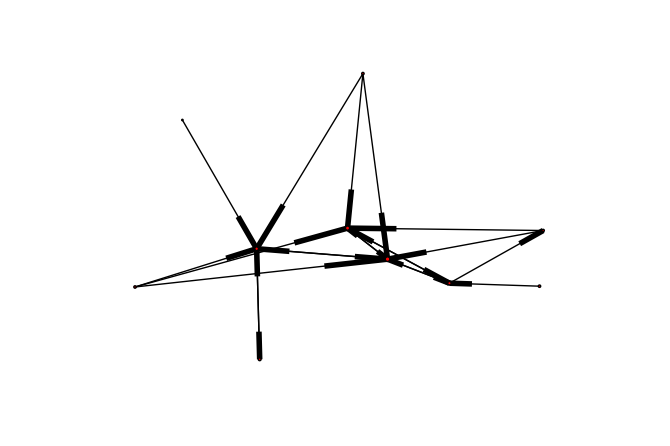

In [85]:
d = nx.degree(subG)
nx.draw(subG,nodelist = d.keys(), node_size = [v for v in d.values()])
plt.show()